In [9]:
import pandas as pd

column_names = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 
                'marital-status', 'occupation', 'relationship', 'race', 
                'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 
                'native-country', 'income']
# Load the data
df = pd.read_csv('adult.data',header=None, names=column_names)
df.race.unique()

array([' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo',
       ' Other'], dtype=object)

In [10]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [11]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
categorical_cols = df.select_dtypes(include=['object']).columns
df[categorical_cols] = encoder.fit_transform(df[categorical_cols])
df.fillna(df.mean(), inplace=True)
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,7.0,77516,9.0,13,4.0,1.0,1.0,4.0,1.0,2174,0,40,39.0,0.0
1,50,6.0,83311,9.0,13,2.0,4.0,0.0,4.0,1.0,0,0,13,39.0,0.0
2,38,4.0,215646,11.0,9,0.0,6.0,1.0,4.0,1.0,0,0,40,39.0,0.0
3,53,4.0,234721,1.0,7,2.0,6.0,0.0,2.0,1.0,0,0,40,39.0,0.0
4,28,4.0,338409,9.0,13,2.0,10.0,5.0,2.0,0.0,0,0,40,5.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,4.0,257302,7.0,12,2.0,13.0,5.0,4.0,0.0,0,0,38,39.0,0.0
32557,40,4.0,154374,11.0,9,2.0,7.0,0.0,4.0,1.0,0,0,40,39.0,1.0
32558,58,4.0,151910,11.0,9,6.0,1.0,4.0,4.0,0.0,0,0,40,39.0,0.0
32559,22,4.0,201490,11.0,9,4.0,1.0,3.0,4.0,1.0,0,0,20,39.0,0.0


In [12]:
X = df.iloc[:,0:-1]
y = df.iloc[:,-1]

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=40)

In [14]:
forest_model = RandomForestClassifier(random_state=40)
forest_model.fit(X_train, y_train)
forest_predictions = forest_model.predict(X_test)
forest_accuracy = accuracy_score(y_test, forest_predictions)
print("Decision Forest Accuracy:", forest_accuracy)

Decision Forest Accuracy: 0.855366190695532


In [15]:
nn_model = MLPClassifier(random_state=40)
nn_model.fit(X_train, y_train)

# Predict on the test set and evaluate
nn_predictions = nn_model.predict(X_test)
nn_accuracy = accuracy_score(y_test, nn_predictions)
print("Neural Network Accuracy:", nn_accuracy)

Neural Network Accuracy: 0.793489943190542


In [16]:
r1 = X_test[X_test['race']==1.0].index
r2 = X_test[X_test['race']==2.0].index
r3 = X_test[X_test['race']==3.0].index
r4 = X_test[X_test['race']==4.0].index

In [17]:
X_1 = X_test.loc[r1]
X_2 = X_test.loc[r2]
X_3 = X_test.loc[r3]
X_4 = X_test.loc[r4]

y_1 = y_test.loc[r1]
y_2 = y_test.loc[r2]
y_3 = y_test.loc[r3]
y_4 = y_test.loc[r4]

In [18]:
foresrt1 = forest_model.predict(X_1)
foresrt2 = forest_model.predict(X_2)
foresrt3 = forest_model.predict(X_3)
foresrt4 = forest_model.predict(X_4)

forest_r1 = accuracy_score(y_1, foresrt1)
forest_r2 = accuracy_score(y_2, foresrt2)
forest_r3 = accuracy_score(y_3, foresrt3)
forest_r4 = accuracy_score(y_4, foresrt4)


print("Decision Forest Accuracy for race 1 Subset:", forest_r1)
print("Decision Forest Accuracy for race 2 Subset:", forest_r2)
print("Decision Forest Accuracy for race 3 Subset:", forest_r3)
print("Decision Forest Accuracy for race 4 Subset:", forest_r4)

Decision Forest Accuracy for race 1 Subset: 0.8504672897196262
Decision Forest Accuracy for race 2 Subset: 0.9284649776453056
Decision Forest Accuracy for race 3 Subset: 0.88
Decision Forest Accuracy for race 4 Subset: 0.8456655785273849


In [19]:
nn1 = nn_model.predict(X_1)
nn2 = nn_model.predict(X_2)
nn3 = nn_model.predict(X_3)
nn4 = nn_model.predict(X_4)

nn_r1 = accuracy_score(y_1, nn1)
nn_r2 = accuracy_score(y_2, nn2)
nn_r3 = accuracy_score(y_3, nn3)
nn_r4 = accuracy_score(y_4, nn4)


print("Neural Network Accuracy for race 1 Subset:", nn_r1)
print("Neural Network Accuracy for race 2 Subset:", nn_r2)
print("Neural Network Accuracy for race 3 Subset:", nn_r3)
print("Neural Network Accuracy for race 4 Subset:", nn_r4)

Neural Network Accuracy for race 1 Subset: 0.822429906542056
Neural Network Accuracy for race 2 Subset: 0.9061102831594635
Neural Network Accuracy for race 3 Subset: 0.9
Neural Network Accuracy for race 4 Subset: 0.7765687341313021


In [20]:
# Identify race subsets with lower accuracy
minority_race_subset = 4  # Assuming this is the minority race subset with lower accuracy

# Oversample the minority race subset
minority = X_train[X_train['race']==1.0].index


X_minority = X_train.loc[minority]
y_minority = y_train.loc[minority]

X_train_oversampled = pd.concat([X_train, X_minority])
y_train_oversampled = pd.concat([y_train, y_minority])

# Train the models on the oversampled training set
forest_model.fit(X_train_oversampled, y_train_oversampled)
nn_model.fit(X_train_oversampled, y_train_oversampled)

forest_predictions = forest_model.predict(X_test)
nn_predictions = nn_model.predict(X_test)



In [21]:
r1 = X_test[X_test['race']==1.0].index
r2 = X_test[X_test['race']==2.0].index
r3 = X_test[X_test['race']==3.0].index
r4 = X_test[X_test['race']==4.0].index

X_1 = X_test.loc[r1]
X_2 = X_test.loc[r2]
X_3 = X_test.loc[r3]
X_4 = X_test.loc[r4]

y_1 = y_test.loc[r1]
y_2 = y_test.loc[r2]
y_3 = y_test.loc[r3]
y_4 = y_test.loc[r4]
foresrt1 = forest_model.predict(X_1)
foresrt2 = forest_model.predict(X_2)
foresrt3 = forest_model.predict(X_3)
foresrt4 = forest_model.predict(X_4)

forest_r1 = accuracy_score(y_1, foresrt1)
forest_r2 = accuracy_score(y_2, foresrt2)
forest_r3 = accuracy_score(y_3, foresrt3)
forest_r4 = accuracy_score(y_4, foresrt4)


print("Decision Forest Accuracy for race 1 Subset:", forest_r1)
print("Decision Forest Accuracy for race 2 Subset:", forest_r2)
print("Decision Forest Accuracy for race 3 Subset:", forest_r3)
print("Decision Forest Accuracy for race 4 Subset:", forest_r4)
nn1 = nn_model.predict(X_1)
nn2 = nn_model.predict(X_2)
nn3 = nn_model.predict(X_3)
nn4 = nn_model.predict(X_4)

nn_r1 = accuracy_score(y_1, nn1)
nn_r2 = accuracy_score(y_2, nn2)
nn_r3 = accuracy_score(y_3, nn3)
nn_r4 = accuracy_score(y_4, nn4)


print("Neural Network Accuracy for race 1 Subset:", nn_r1)
print("Neural Network Accuracy for race 2 Subset:", nn_r2)
print("Neural Network Accuracy for race 3 Subset:", nn_r3)
print("Neural Network Accuracy for race 4 Subset:", nn_r4)

Decision Forest Accuracy for race 1 Subset: 0.8691588785046729
Decision Forest Accuracy for race 2 Subset: 0.9269746646795827
Decision Forest Accuracy for race 3 Subset: 0.88
Decision Forest Accuracy for race 4 Subset: 0.8467537178092129
Neural Network Accuracy for race 1 Subset: 0.7897196261682243
Neural Network Accuracy for race 2 Subset: 0.8897168405365127
Neural Network Accuracy for race 3 Subset: 0.88
Neural Network Accuracy for race 4 Subset: 0.7622415669205659


In [22]:
r1 = X_test[X_test['sex']==1.0].index
r2 = X_test[X_test['sex']==0.0].index
X_1 = X_test.loc[r1]
X_2 = X_test.loc[r2]
y_1 = y_test.loc[r1]
y_2 = y_test.loc[r2]

foresrt1 = forest_model.predict(X_1)
foresrt2 = forest_model.predict(X_2)
forest_r1 = accuracy_score(y_1, foresrt1)
forest_r2 = accuracy_score(y_2, foresrt2)
print("Decision Forest Accuracy for  male Subset:", forest_r1)
print("Decision Forest Accuracy for female Subset:", forest_r2)

nn1 = nn_model.predict(X_1)
nn2 = nn_model.predict(X_2)
nn_r1 = accuracy_score(y_1, nn1)
nn_r2 = accuracy_score(y_2, nn2)
print("Neural Network Accuracy for male Subset:", nn_r1)
print("Neural Network Accuracy for female Subset:", nn_r2)

Decision Forest Accuracy for  male Subset: 0.819634703196347
Decision Forest Accuracy for female Subset: 0.9315518049695265
Neural Network Accuracy for male Subset: 0.7244292237442922
Neural Network Accuracy for female Subset: 0.890295358649789


In [23]:
from sklearn.utils import resample

# Step 1: Identify the size of the male and female groups in the original training data
male_indices = X_train[X_train['sex'] == 1.0].index
female_indices = X_train[X_train['sex'] == 0.0].index

male_size = len(male_indices)
female_size = len(female_indices)

print(f"Male size: {male_size}")
print(f"Female size: {female_size}")

# Step 2: Calculate the underrepresentation of the male group
underrepresentation_factor = female_size / male_size

# Step 3: Oversample the male group
X_train_oversampled, y_train_oversampled = resample(X_train.loc[male_indices],
                                                  y_train.loc[male_indices],
                                                  replace=True,
                                                  n_samples=int(male_size * underrepresentation_factor),
                                                  random_state=40)

# Combine the oversampled male data with the original female data
X_train_balanced = pd.concat([X_train.loc[female_indices], X_train_oversampled])
y_train_balanced = pd.concat([y_train.loc[female_indices], y_train_oversampled])

# Fit the models using the balanced training data
forest_model.fit(X_train_balanced, y_train_balanced)
nn_model.fit(X_train_balanced, y_train_balanced)


Male size: 17410
Female size: 8638


MLPClassifier(random_state=40)

In [24]:
# Find the male and female indices in the test set
male_indices_test = X_test[X_test['sex'] == 1.0].index
female_indices_test = X_test[X_test['sex'] == 0.0].index

# Get the predictions for the male and female subsets
forest_predictions_male = forest_model.predict(X_test.loc[male_indices_test])
forest_predictions_female = forest_model.predict(X_test.loc[female_indices_test])

nn_predictions_male = nn_model.predict(X_test.loc[male_indices_test])
nn_predictions_female = nn_model.predict(X_test.loc[female_indices_test])

# Calculate the accuracy for the male and female subsets
forest_accuracy_male = accuracy_score(y_test.loc[male_indices_test], forest_predictions_male)
forest_accuracy_female = accuracy_score(y_test.loc[female_indices_test], forest_predictions_female)

nn_accuracy_male = accuracy_score(y_test.loc[male_indices_test], nn_predictions_male)
nn_accuracy_female = accuracy_score(y_test.loc[female_indices_test], nn_predictions_female)

# Print the results
print("Decision Forest Accuracy for male Subset:", forest_accuracy_male)
print("Decision Forest Accuracy for female Subset:", forest_accuracy_female)
print("Neural Network Accuracy for male Subset:", nn_accuracy_male)
print("Neural Network Accuracy for female Subset:", nn_accuracy_female)

Decision Forest Accuracy for male Subset: 0.8089041095890411
Decision Forest Accuracy for female Subset: 0.9278012189404594
Neural Network Accuracy for male Subset: 0.30753424657534245
Neural Network Accuracy for female Subset: 0.11533052039381153


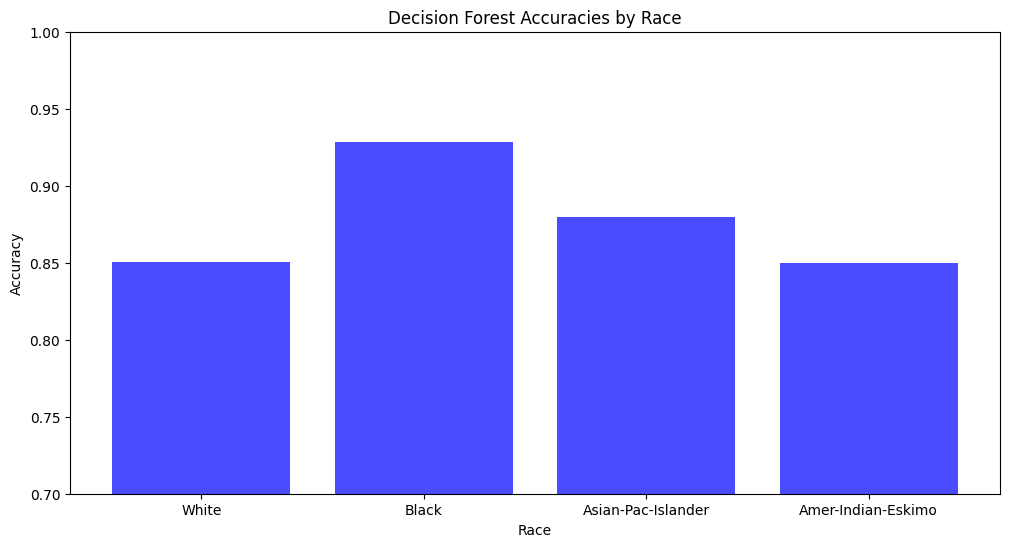

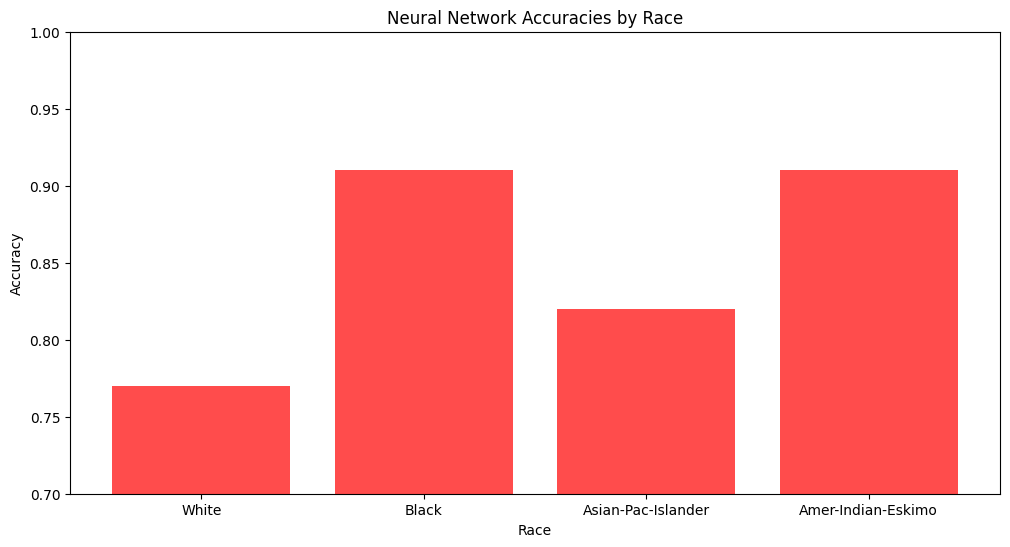

In [30]:
import matplotlib.pyplot as plt

# Define the race categories
races = ['White', 'Black', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo']

# Accuracies for Decision Forest
decision_forest_accuracies = [0.8504672897196262, 0.9284649776453056, 0.88, 0.85]

# Accuracies for Neural Network
neural_network_accuracies = [0.77, 0.91, 0.82, 0.91]

# Create bar plots
plt.figure(figsize=(12, 6))


plt.bar(races, decision_forest_accuracies, color='b', alpha=0.7)
plt.ylim(0.7, 1)
plt.xlabel('Race')
plt.ylabel('Accuracy')
plt.title('Decision Forest Accuracies by Race')
plt.show()

plt.figure(figsize=(12, 6))
plt.bar(races, neural_network_accuracies, color='r', alpha=0.7)
plt.ylim(0.7, 1)
plt.xlabel('Race')
plt.ylabel('Accuracy')
plt.title('Neural Network Accuracies by Race')


plt.show()
